# Plots of Theoretical and Practical Running Time

In [5]:
# import statements
import csv
import os
import re

# for plots
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import pygtrie

In [6]:
# giant_string.py (modified to generate different n)
string_files = [f'one_giant_string{i}.txt' for i in range(10)]

def create_individual_text_files(file_index):
    with open(f'one_giant_string{file_index}.txt', 'w', encoding="utf8") as output_file:
        with open("one_giant_string.txt", 'r', encoding="utf8") as all_data:
            data = all_data.read().split()
            limit = file_index * 1000000
            output_file.write(" ".join(data[:limit]))


for index in range(10):
    create_individual_text_files(index)    

In [7]:
# abbreviation_converter.py (modified to run through and plot different n)
abbreviations = {
    "wth": "What The Hell",
    "asap": "As Soon As Possible",
    "btw": "By The Way",
    "diy": "Do It Yourself",
    "eta": "Estimated Time of Arrival",
    "fyi": "For Your Information",
    "idk": "I Don't Know",
    "imo": "In My Opinion",
    "imho": "In My Humble Opinion",
    "omw": "On My Way",
    "ttyl": "Talk To You Later",
    "wip": "Work In Progress",
    "ty": "Thank You",
    "lmao": "Laughing My A** Off",
    "lol": "Laughing Out Loud",
    "rofl": "Rolling On the Floor Laughing",
    "icymi": "In Case You Missed It",
    "tldr": "Too Long Didn't Read",
    "tmi": "Too Much Information",
    "lmk": "Let Me Know",
    "nvm": "Nevermind",
    "ftw": "For The Win",
    "np": "No Problem",
    "jk": "Just Kidding",
    "jw": "Just Wondering",
    "rn": "Right Now",
    "irl": "In Real Life",
    "dae": "Does Anyone Else",
    "gg": "Good Game",
    "smh": "Shaking My Head",
    "ngl": "Not Gonna Lie",
    "ikr": "I Know Right",
    "wtf": "What The F***",
    "aa": "Alcoholics Anonymous",
    "temp": "Temporary",
    "vs": "Versus",
    "lb": "Pound",
    "lbs": "Pounds",
    "ave": "Avenue",
    "blvd": "Boulevard",
    "st": "Street",
    "rd": "Road",
    "ba": "Bachelor of Arts",
    "bs": "Bachelor of Science",
    "dr": "Doctor",
    "ceo": "Chief Executive Officer",
    "cfo": "Chief Financial Officer",
    "cmo": "Chief Marketing Officer",
    "vp": "Vice President",
    "afaik": "As Far As I Know",
    "afk": "Away From Keyboard",
    "pst": "Pacific Standard Time",
    "mst": "Mountain Standard Time",
    "cst": "Central Standard Time",
    "est": "Eastern Standard Time",
    "utc": "Universal Time Coordinated",
    "etc": "Etcetera",
    "ie": "That Is",
    "rip": "Rest In Peace",
    "sos": "Save Our Souls",
    "ram": "Ramdom Access Memory",
    "url": "Uniform Resource Locator",
    "gif": "Grapics Interchange Format",
    "png": "Portable Network Graphics",
    "awol": "Absent Without Leave",
    "madd": "Mothers Against Drunk Driving",
    "dm": "Direct Message",
    "wfh": "Work From Home",
    "tbh": "To Be Honest"
}

t = pygtrie.CharTrie(abbreviations)


def replace_abbreviations(line, abbrev_dict=None, trie=None):
    if trie:
        pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                             for key in trie.keys()) + r')\b', re.IGNORECASE)
        return pattern.sub(lambda x: trie.get(x.group().lower(), x.group()), line)
    elif abbrev_dict:
        pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                             for key in abbrev_dict.keys()) + r')\b', re.IGNORECASE)
        return pattern.sub(lambda x: abbrev_dict[x.group().lower()], line)


def run_algorithm(algorithm_type="hash"):
    output_file = "converted_giant_string.txt"
    nValues = []
    tValues = []

    for i, input_file in enumerate(string_files):
        start_time = time.time()

        with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
            for line in infile:
                if algorithm_type == "hash":
                    converted_line = replace_abbreviations(
                        line, abbrev_dict=abbreviations)
                elif algorithm_type == "trie":
                    converted_line = replace_abbreviations(line, trie=t)
                outfile.write(converted_line)

        running_time = time.time() - start_time
        nValues.append(i * 1000000)
        tValues.append(running_time)
        print(f"Conversion completed for {input_file}.")
        print("Practical Running Time in Seconds: ", running_time)

    return nValues, tValues


nValuesHash, tValuesHash = run_algorithm("hash")
nValuesTrie, tValuesTrie = run_algorithm("trie")


Conversion completed for one_giant_string0.txt.
Practical Running Time in Seconds:  0.0004076957702636719
Conversion completed for one_giant_string1.txt.
Practical Running Time in Seconds:  1.2612497806549072
Conversion completed for one_giant_string2.txt.
Practical Running Time in Seconds:  2.5092570781707764
Conversion completed for one_giant_string3.txt.
Practical Running Time in Seconds:  3.8139326572418213
Conversion completed for one_giant_string4.txt.
Practical Running Time in Seconds:  5.0374531745910645
Conversion completed for one_giant_string5.txt.
Practical Running Time in Seconds:  6.316550254821777
Conversion completed for one_giant_string6.txt.
Practical Running Time in Seconds:  7.58125901222229
Conversion completed for one_giant_string7.txt.
Practical Running Time in Seconds:  8.828542947769165
Conversion completed for one_giant_string8.txt.
Practical Running Time in Seconds:  10.219902038574219
Conversion completed for one_giant_string9.txt.
Practical Running Time in 

Text(0.5, 1.0, 'Actual Running Time - Hash')

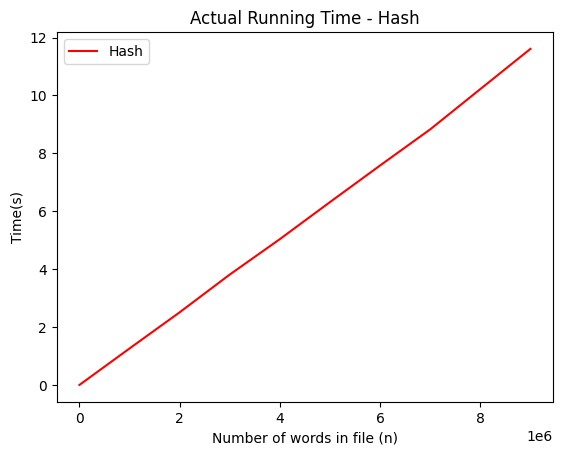

In [8]:
# practical plot for hash

plt.plot(nValuesHash, tValuesHash, color='red', label="Hash")

plt.xlabel("Number of words in file (n)")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time - Hash")

Text(0.5, 1.0, 'Actual Running Time - Trie')

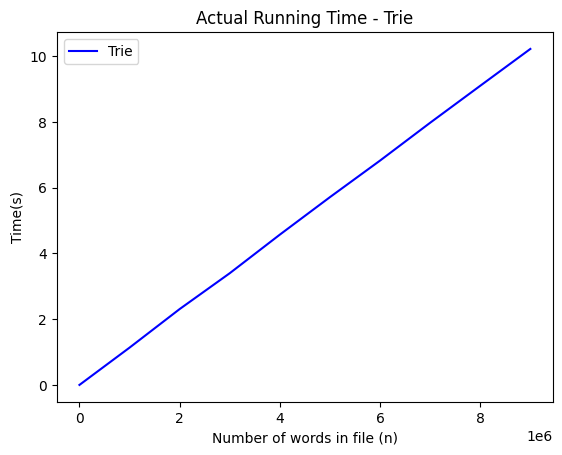

In [9]:
# practical plot for trie

plt.plot(nValuesTrie, tValuesTrie, color='blue', label="Trie")

plt.xlabel("Number of words in file (n)")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time - Trie")

Text(0.5, 1.0, 'Actual Running Time - Combined')

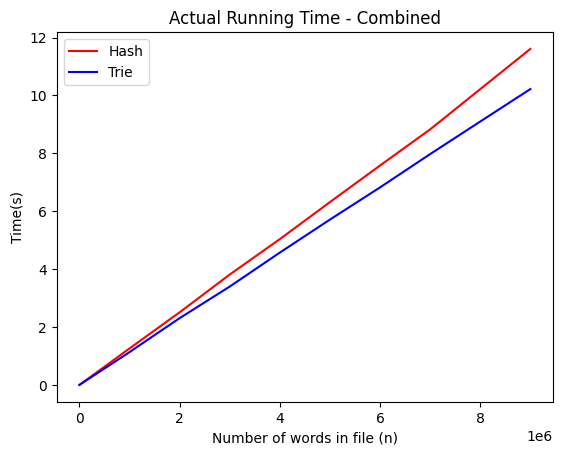

In [10]:
# combined plot

plt.plot(nValuesHash, tValuesHash, color='red', label="Hash")
plt.plot(nValuesTrie, tValuesTrie, color='blue', label="Trie")

plt.xlabel("Number of words in file (n)")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time - Combined")

69


Text(0.5, 1.0, 'Theoretical Running Time')

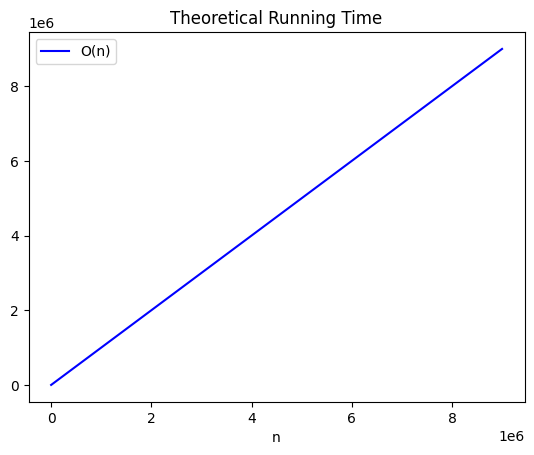

In [11]:
## theoretical plot
m = int(len(abbreviations))
print(m)
plt.plot(nValuesHash, nValuesHash, color='blue', label="O(n)")
plt.xlabel("n")
plt.legend()
plt.title("Theoretical Running Time")

In [16]:
# Test cases
test_cases = [
    "btw, I'm going to the store! jk I'm not lol",
    "I'll talk to you later. ttyl, I'm afk now lol!",
    "We're planning a diy project rn, just got back from my aa meeting."
]

# Test with hash
print("Using hash:")
for test_case in test_cases:
    print("Input: ", test_case)
    result = replace_abbreviations(test_case, abbrev_dict=abbreviations)
    print("Output: ", result)
    print()

# Test with trie
print("Using trie:")
for test_case in test_cases:
    print("Input: ", test_case)
    result = replace_abbreviations(test_case, trie=t)
    print("Output: ", result)
    print()


Using hash:
Input:  btw, I'm going to the store! jk I'm not lol
Output:  By The Way, I'm going to the store! Just Kidding I'm not Laughing Out Loud

Input:  I'll talk to you later. ttyl, I'm afk now lol!
Output:  I'll talk to you later. Talk To You Later, I'm Away From Keyboard now Laughing Out Loud!

Input:  We're planning a diy project rn, just got back from my aa meeting.
Output:  We're planning a Do It Yourself project Right Now, just got back from my Alcoholics Anonymous meeting.

Using trie:
Input:  btw, I'm going to the store! jk I'm not lol
Output:  By The Way, I'm going to the store! Just Kidding I'm not Laughing Out Loud

Input:  I'll talk to you later. ttyl, I'm afk now lol!
Output:  I'll talk to you later. Talk To You Later, I'm Away From Keyboard now Laughing Out Loud!

Input:  We're planning a diy project rn, just got back from my aa meeting.
Output:  We're planning a Do It Yourself project Right Now, just got back from my Alcoholics Anonymous meeting.

